# SVM

Accuracy: 0.7337662337662337


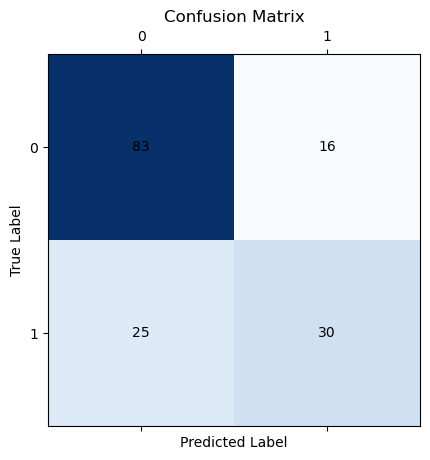

NameError: name 'plot_roc_curve' is not defined

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the Diabetes dataset into a DataFrame
diabetes_df = pd.read_csv('c:/Users/RMRAM/Downloads/Compressed/archive/diabetes.csv')

# Split the dataset into training and testing sets
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier on the training set
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Tune the hyperparameters of the SVM classifier using GridSearchCV
params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm, params, cv=5)
svm_grid.fit(X_train_scaled, y_train)

# Evaluate the performance of the SVM classifier on the testing set
y_pred = svm_grid.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.matshow(cm, cmap='Blues')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plot_roc_curve(svm_grid, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()
